In [3]:
# 分析某地共享单车的需求量与各环境因素、时间因素的关系

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "D:\\2022shared_bike\\"

In [4]:
data = pd.read_csv(path + 'shared_bikes.csv', engine='python')

In [5]:
data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


##### 数据变量含时间，气温t1，体感温度t2，湿度hum，风速，天气代码，节假日，周末，季度。因变量为单车需求量cnt。按数据清洗和特征工程大致程序，检查缺失值、异常值、变量相关性，需做变量分箱，scaling，变量合成，及因变量分箱等。

In [6]:
# 检查缺失值

import toad

toad.detect(data)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
timestamp,object,17414,0.00%,17414,2015-01-04 00:00:00:0.01%,2016-05-04 12:00:00:0.01%,2016-05-04 18:00:00:0.01%,2016-05-04 17:00:00:0.01%,2016-05-04 16:00:00:0.01%,2015-09-03 17:00:00:0.01%,2015-09-03 18:00:00:0.01%,2015-09-03 19:00:00:0.01%,2015-09-03 20:00:00:0.01%,2017-01-03 23:00:00:0.01%
cnt,int64,17414,0.00%,3781,1143.101642,1085.108068,0.0,29.13,86.0,844.0,1671.75,2644.0,4552.74,7860.0
t1,float64,17414,0.00%,73,12.468091,5.571818,-1.5,1.0,5.0,12.5,16.0,20.0,25.5,34.0
t2,float64,17414,0.00%,82,11.520836,6.615145,-6.0,-2.0,2.5,12.5,16.0,20.0,25.5,34.0
hum,float64,17414,0.00%,143,72.324954,14.313186,20.5,36.5,51.5,74.5,83.0,88.0,96.5,100.0
wind_speed,float64,17414,0.00%,103,15.913063,7.89457,0.0,2.0,6.5,15.0,20.5,27.0,38.0,56.5
weather_code,float64,17414,0.00%,7,2.722752,2.341163,1.0,1.0,1.0,2.0,3.0,7.0,7.0,26.0
is_holiday,float64,17414,0.00%,2,0.022051,0.146854,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
is_weekend,float64,17414,0.00%,2,0.285403,0.451619,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
season,float64,17414,0.00%,4,1.492075,1.118911,0.0,0.0,0.0,1.0,2.0,3.0,3.0,3.0


In [7]:
data.groupby(by='weather_code').count()/len(data)

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,season
weather_code,,,,,,,,,
1.0,0.353164,0.353164,0.353164,0.353164,0.353164,0.353164,0.353164,0.353164,0.353164
2.0,0.231653,0.231653,0.231653,0.231653,0.231653,0.231653,0.231653,0.231653,0.231653
3.0,0.203916,0.203916,0.203916,0.203916,0.203916,0.203916,0.203916,0.203916,0.203916
4.0,0.084070,0.084070,0.084070,0.084070,0.084070,0.084070,0.084070,0.084070,0.084070
7.0,0.122947,0.122947,0.122947,0.122947,0.122947,0.122947,0.122947,0.122947,0.122947
10.0,0.000804,0.000804,0.000804,0.000804,0.000804,0.000804,0.000804,0.000804,0.000804
26.0,0.003446,0.003446,0.003446,0.003446,0.003446,0.003446,0.003446,0.003446,0.003446


##### 初步观察，数据集不存在缺失值。
##### 自变量方面，以75%和max的值差距来看，仅有weather_code一列存在极端值。根据数据描述，此处代码含义为 1 = 晴朗；2 = 散云/一些云；3 = 碎云/云层疏松；4 = 多云；7 = 雨/小雨阵雨/小雨；10 = 雨与雷暴；26 = 降雪。由于大多数值落在1~7，极端值仅占0.3%，可以对weather_code进行二分箱，或多分箱，最后根据模型预测效果决定分箱策略。
##### timestamp类型不能直接用于学习，需拆解成季度（已拆，为season），月，星期，日和小时，保留数据分布有明显差异度的时间量度。
##### 两个体温变量有高相关性的嫌疑。同样，节假日和周末可能也要合并。
##### 湿度变量需要scaling，除以100
##### 因变量的值较为离散，实际投放不需要精准定量，只要投放合理需求范围内的单车数量即可。故需比较因变量分箱（多分类）和不分箱（回归）的效果

In [8]:
# 数据清洗和特征工程

#时间
from datetime import datetime

data['date'] = data['timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
data['month'] = data['date'].apply(lambda x: x.month)
data['day'] = data['date'].apply(lambda x: x.day)
data['weekday'] = data['date'].apply(lambda x: (x.weekday()+1))
data['hour'] = data['date'].apply(lambda x: x.hour)
data['season'] = data['season'] + 1


In [9]:
# 天气分箱，分别采取二分和多分的分箱
map_multi = {1.0:1, 2.0:2, 3.0:3, 4.0:4, 7.0:5, 10.0:5, 26.0:5}
map_bin = {1.0:0, 2.0:0, 3.0:0, 4.0:0, 7.0:1, 10.0:1, 26.0:1}
data['weather_code_bin'] = data['weather_code'].apply(lambda x: map_bin[x])
data['weather_code_multi'] = data['weather_code'].apply(lambda x: map_multi[x])

In [10]:
# 湿度转换
data['hum_p'] = data['hum']/100

In [11]:
# 节假日和周末合并。如果既是节假日又是周末，也标记为1（非工作日）。
data['is_weekday'] = (data['is_holiday'] + data['is_weekend']).apply(lambda x: min(x, 1))

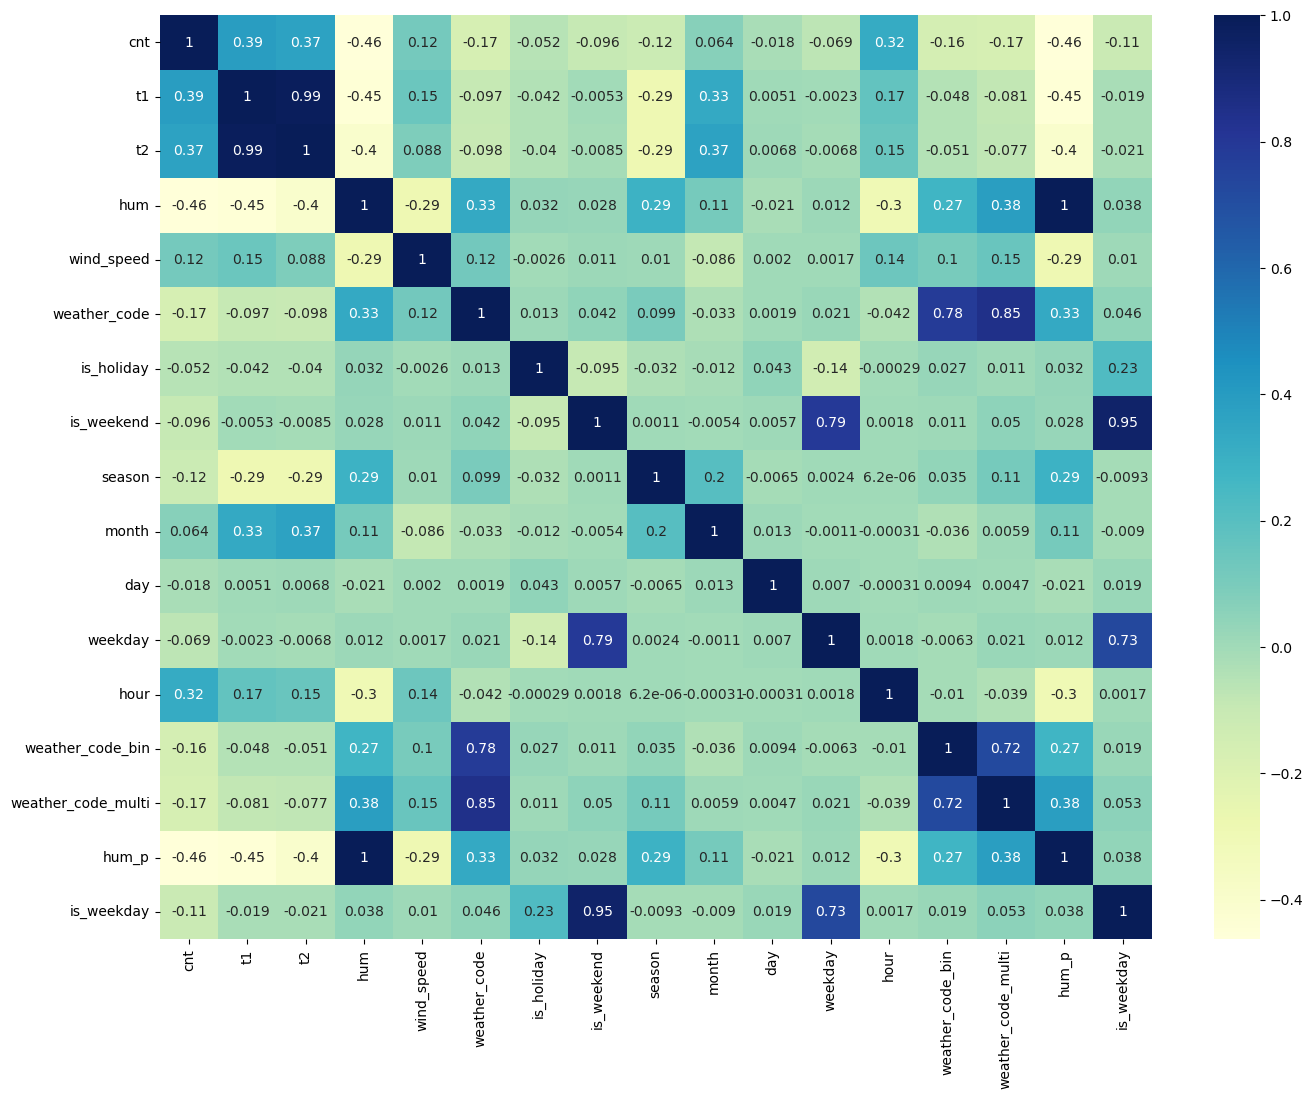

In [12]:
# 观察变量相关系数
plt.figure(figsize=[16,12])
sns.heatmap(data.corr(method='pearson'), cmap="YlGnBu", annot=True)
plt.show()

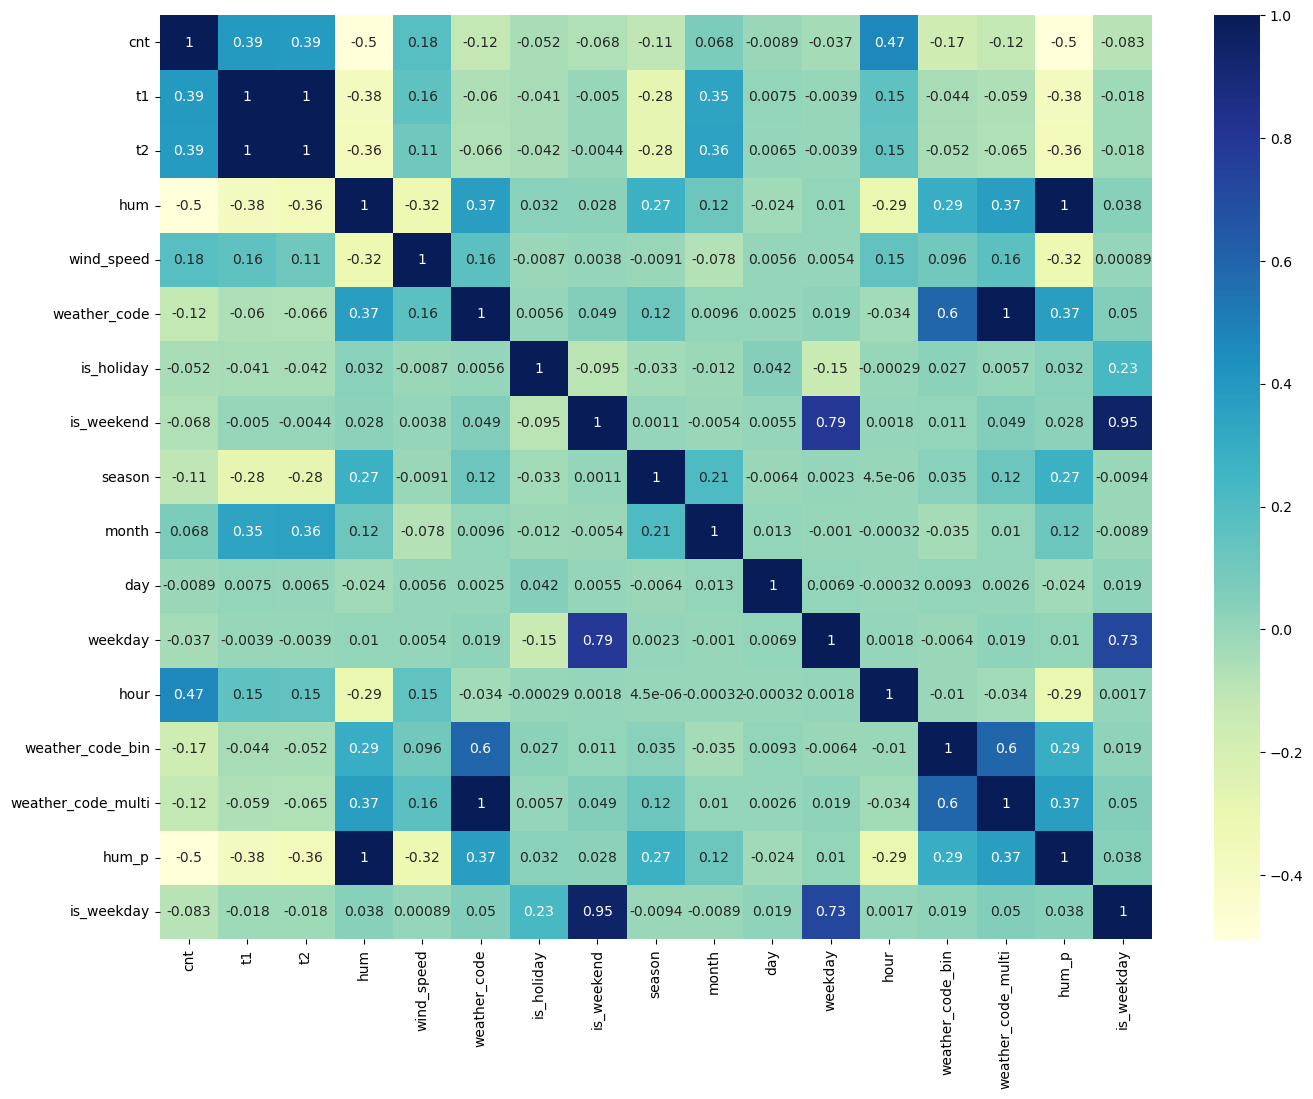

In [13]:
plt.figure(figsize=[16,12])
sns.heatmap(data.corr(method='spearman'), cmap="YlGnBu", annot=True)
plt.show()

##### 相关系数高于0.7的变量对（忽略合成前后的变量）：t1和t2，is_weekend和weekday，is_weekday和weekday。
##### 保留t1；weekday，is_weekday和is_weekend只能保留一个。如果数据在weekday上分布差异性强，可以保留weekday，否则保留is_weekend。

Text(0, 0.5, 'Bike counts')

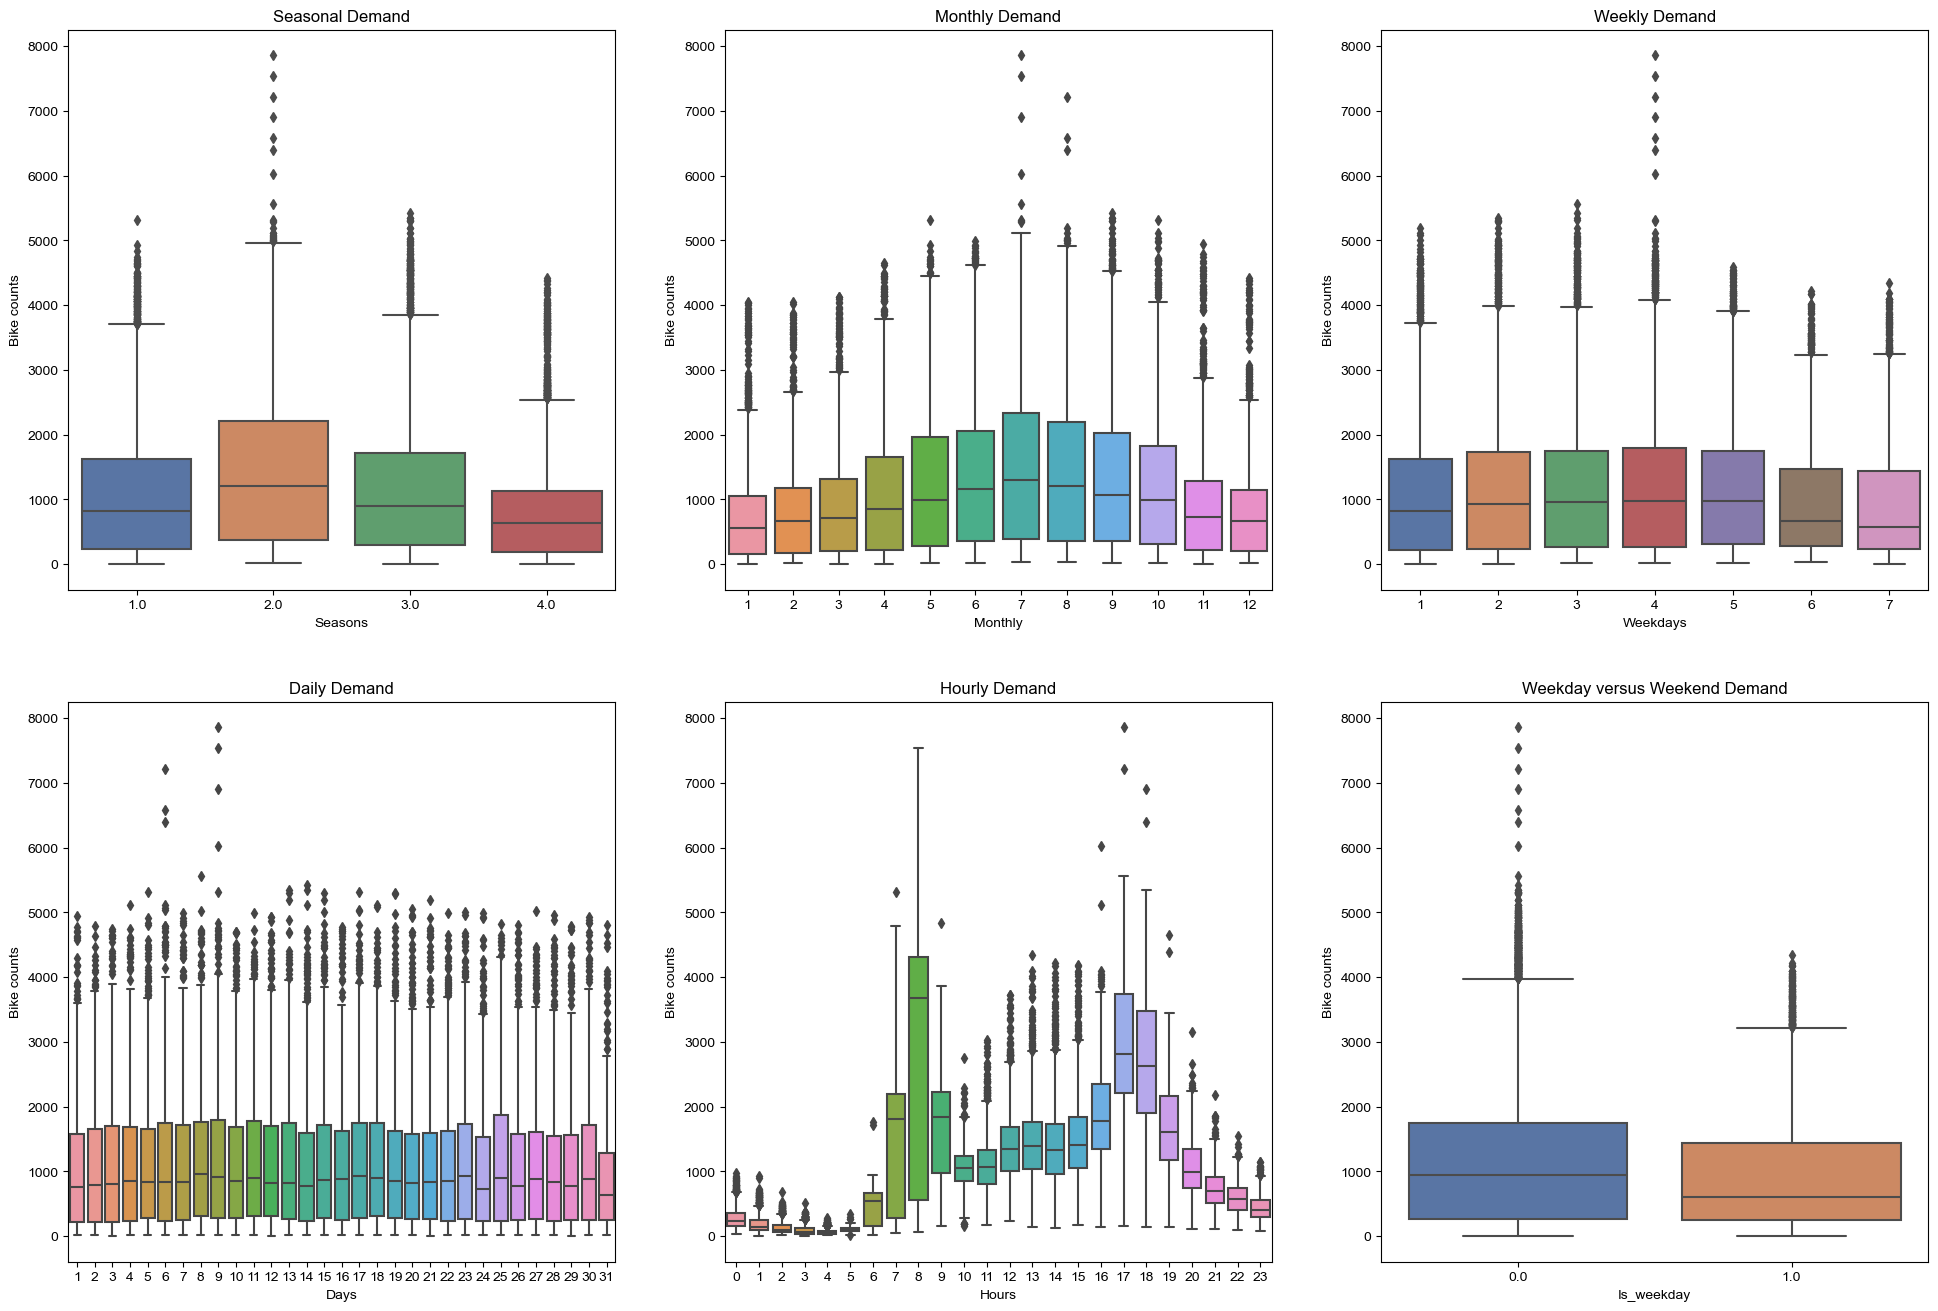

In [14]:
# 需求量对季度、月、周、日、小时，以及工作日/周末绘图

plt.rcParams['figure.figsize'] = [24, 16]
fig, axes = plt.subplots(nrows=2, ncols=3)
sns.set_theme()

sns.boxplot(data=data, x='season', y='cnt', ax=axes[0,0])
axes[0,0].set_title('Seasonal Demand')
axes[0,0].set_xlabel('Seasons')
axes[0,0].set_ylabel('Bike counts')

sns.boxplot(data=data, x='month', y='cnt', ax=axes[0,1])
axes[0,1].set_title('Monthly Demand')
axes[0,1].set_xlabel('Monthly')
axes[0,1].set_ylabel('Bike counts')

sns.boxplot(data=data, x='weekday', y='cnt', ax=axes[0,2])
axes[0,2].set_title('Weekly Demand')
axes[0,2].set_xlabel('Weekdays')
axes[0,2].set_ylabel('Bike counts')

sns.boxplot(data=data, x='day', y='cnt', ax=axes[1,0])
axes[1,0].set_title('Daily Demand')
axes[1,0].set_xlabel('Days')
axes[1,0].set_ylabel('Bike counts')

sns.boxplot(data=data, x='hour', y='cnt', ax=axes[1,1])
axes[1,1].set_title('Hourly Demand')
axes[1,1].set_xlabel('Hours')
axes[1,1].set_ylabel('Bike counts')

sns.boxplot(data=data, x='is_weekday', y='cnt', ax=axes[1,2])
axes[1,2].set_title('Weekday versus Weekend Demand')
axes[1,2].set_xlabel('Is_weekday')
axes[1,2].set_ylabel('Bike counts')

##### 可以看出，需求在season, month, hour上的分布差异较明显，表明变量预测需求量的能力可能较强；在day上的分布差异较不明显，但仍可以保留；在weekday上的分布差异类似is_weekday，因此，应保留is_weekday

In [15]:
# 最后，需要把因变量对数化。实测不进行对数化，模型预测效果很差。
data['logcnt'] = data['cnt'].apply(lambda x: np.log(x) if x>0 else 0)
data.drop(columns=['cnt'], inplace=True)

In [16]:
# 合成最终数据集
fdata_multi = data.drop(columns=['t2', 'is_weekend', 'weekday', 'hum', 'weather_code', 'weather_code_bin', 'date', 'timestamp'])
fdata_bin = data.drop(columns=['t2', 'is_weekend', 'weekday', 'hum', 'weather_code', 'weather_code_multi', 'date', 'timestamp'])

In [17]:
# 作为回归问题来建模：多元线性回归，Ridge回归，SVR，集成树回归

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.kernel_approximation import Nystroem
from sklearn.svm import LinearSVR

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [18]:
# R方或调整R方的计算公式里包含的是训练集的ybar，不是测试集y_bar。当训练集和测试集的y_bar相差较大时，R方的值会变成负数。
# 预测R方度量模型的预测性能是否好。计算预测R方时，先随机地去掉一个样本点，计算模型预测剩余值产生的总误差，然后在整个样本上滚动测试，最后统计（1-总误差）占总离差平方和的比例

def predicted_r2(x_test, y_true, y_pred):

    X = x_test.values

    #计算预测平方和 PRESS
    hat = X.dot(np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X)))
    denom = (1 - np.diag(hat))
    resid = np.abs(y_pred - y_true).to_numpy()
    PRESS = np.sum((resid/denom)**2)

    #计算总离差平方和 Sum of Square total
    SST = np.sum((y_true - y_true.mean())**2)

    #计算预测R方
    pred_r2 = 1 - PRESS/SST
    return(pred_r2)

In [19]:
# 由于数据集响应变量的取值存在0，MAPE会过大。解决方法是用SMAPE，避免分母出现接近0的值。

def symmetrical_mean_absolute_percentage_error(y_test, y_pred):
    t = 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
    return(t)

In [20]:
def metrics_pred(x_test, y_pred, y_test, df):
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    smape = symmetrical_mean_absolute_percentage_error(y_test, y_pred)

    pred_r2 = predicted_r2(x_test, y_test, y_pred)

    metrics = pd.DataFrame({'MAE':mae, 'MAPE':mape, 'SMAPE':smape, 'MSE':mse, 'RMSE':rmse, 'Predicted R^2':pred_r2}, index=[0])
    return(metrics)


In [21]:
X = fdata_multi.drop(columns=['logcnt'])
y = fdata_multi['logcnt']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# 线性回归
lr = LinearRegression(fit_intercept=False)
y_pred_lr = lr.fit(x_train, y_train).predict(x_test)
m_lr = metrics_pred(x_test, y_pred_lr, y_test, fdata_multi)

In [23]:
m_lr

,MAE,MAPE,SMAPE,MSE,RMSE,Predicted R^2
0,0.984435,4.648276e+12,15.893984,1.464583,1.2102,0.1176


In [24]:
# 岭回归
ridge = Ridge(alpha=5)
y_pred_r = ridge.fit(x_train, y_train).predict(x_test)
m_ridge = metrics_pred(x_test, y_pred_r, y_test, fdata_multi)

In [25]:
m_ridge

,MAE,MAPE,SMAPE,MSE,RMSE,Predicted R^2
0,0.758704,4.482018e+12,12.558907,0.921588,0.959994,0.444777


In [26]:
# Lasso
lasso = Lasso(alpha=1)
y_pred_la = lasso.fit(x_train, y_train).predict(x_test)
m_lasso = metrics_pred(x_test, y_pred_la, y_test, fdata_multi)

In [27]:
m_lasso

,MAE,MAPE,SMAPE,MSE,RMSE,Predicted R^2
0,0.866555,4.812794e+12,14.230503,1.076828,1.037703,0.35116


In [28]:
# SVR

svr = LinearSVR(C=10, max_iter = 500000)
y_pred_svr = svr.fit(x_train, y_train).predict(x_test)
m_svr = metrics_pred(x_test, y_pred_svr, y_test, fdata_multi)

d:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [29]:
m_svr

,MAE,MAPE,SMAPE,MSE,RMSE,Predicted R^2
0,0.753867,4.720077e+12,12.495188,0.938301,0.968659,0.434696


##### 可以看到上述线性算法的回归效果都不尽人意，说明数据中的非线性关联很强，用带kernel的SVR或决策树、集成树，甚至poly reg都是可以的

In [30]:
# 数据集较大，不推荐用SVR，这里只展示下不同kernel的SVR

#from sklearn.svm import SVR

#svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
#svr_lin = SVR(kernel="linear", C=100, gamma="auto")
#svr_poly = SVR(kernel="poly", C=10, gamma="auto", degree=3, epsilon=0.1, coef0=1)
#y_pred_polysvr = svr_poly.fit(x_train, y_train).predict(x_test)
#m_polysvr = metrics_pred(x_test, y_pred_polysvr, y_test, fdata_multi)

In [36]:
# 用Nystroem方法近似一个kernel函数，将非线性空间映射到线性空间上（效果并不好）

n_rbf = Nystroem('rbf', gamma=0.2, random_state=0, n_components=10)
df_transformed = n_rbf.fit_transform(X)
X_transformed = pd.DataFrame(df_transformed, columns=X.columns)

xt_train, xt_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=0)

# kernel SVR

ksvr = LinearSVR(C=10, max_iter = 500000)
y_pred_ksvr = ksvr.fit(xt_train, y_train).predict(xt_test)
m_ksvr = metrics_pred(xt_test, y_pred_ksvr, y_test, fdata_multi)


In [37]:
m_ksvr

,MAE,MAPE,SMAPE,MSE,RMSE,Predicted R^2
0,1.039013,5.814955e+12,16.918905,1.77343,1.331702,-4.018559e+06


In [ ]:
# kernel map是否还有调参空间？
#n_poly = Nystroem('poly', degree = 3, gamma=0.1, random_state=0, n_components=300)
#X_transformed = n_poly.fit_transform(X)

#xt_train, xt_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=0)

# kernel SVR

#ksvr = LinearSVR(C=1, max_iter = 500000)
#y_pred_ksvr = ksvr.fit(xt_train, y_train).predict(xt_test)
#m_ksvr = metrics_pred(x_test, y_pred_ksvr, y_test, fdata_multi)

In [39]:
# CART决策树回归

cart = DecisionTreeRegressor()
y_pred_cart = cart.fit(x_train, y_train).predict(x_test)
m_cart = metrics_pred(x_test, y_pred_cart, y_test, fdata_multi)

In [40]:
m_cart  # 从SMAPE和预测R方看，效果远好于线性模型，可见数据的非线性特征极其强

,MAE,MAPE,SMAPE,MSE,RMSE,Predicted R^2
0,0.221848,5.097043e+12,3.945175,0.113252,0.336529,0.931692


In [41]:
# GBDT决策树回归

gbdt = GradientBoostingRegressor()
y_pred_gbdt = gbdt.fit(x_train, y_train).predict(x_test)
m_gbdt = metrics_pred(x_test, y_pred_gbdt, y_test, fdata_multi)

In [42]:
m_gbdt # GBDT的效果又略好于CART树。

,MAE,MAPE,SMAPE,MSE,RMSE,Predicted R^2
0,0.228418,4.619384e+12,3.8668,0.10382,0.322211,0.937393


In [43]:
# 随机森林（bagging）

rf = RandomForestRegressor()
y_pred_rf = rf.fit(x_train, y_train).predict(x_test)
m_rf = metrics_pred(x_test, y_pred_rf, y_test, fdata_multi)

In [44]:
m_rf # 从SMAPE和R方看，效果比GBDT有很大提升

,MAE,MAPE,SMAPE,MSE,RMSE,Predicted R^2
0,0.16233,4.460898e+12,2.881232,0.059952,0.244851,0.963841


In [46]:
# XGBoost回归

xgb0 = XGBRegressor()
y_pred_xgb0 = xgb0.fit(x_train, y_train).predict(x_test)
m_xgb0 = metrics_pred(x_test, y_pred_xgb0, y_test, fdata_multi)

d:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [47]:
m_xgb0 # 较随机森林略有所提升

,MAE,MAPE,SMAPE,MSE,RMSE,Predicted R^2
0,0.150183,4.747771e+12,2.643977,0.049847,0.223264,0.96994


In [48]:
# Catboost回归

cat0 = CatBoostRegressor()
y_pred_cat0 = cat0.fit(x_train, y_train).predict(x_test)
m_cat0 = metrics_pred(x_test, y_pred_cat0, y_test, fdata_multi)

Learning rate set to 0.06078
0:	learn: 1.2307943	total: 166ms	remaining: 2m 45s
1:	learn: 1.1781037	total: 168ms	remaining: 1m 23s
2:	learn: 1.1257871	total: 170ms	remaining: 56.4s
3:	learn: 1.0771494	total: 172ms	remaining: 42.7s
4:	learn: 1.0294696	total: 173ms	remaining: 34.5s
5:	learn: 0.9899085	total: 175ms	remaining: 29s
6:	learn: 0.9487319	total: 177ms	remaining: 25.1s
7:	learn: 0.9068641	total: 179ms	remaining: 22.2s
8:	learn: 0.8687711	total: 180ms	remaining: 19.9s
9:	learn: 0.8355394	total: 183ms	remaining: 18.1s
10:	learn: 0.8025202	total: 186ms	remaining: 16.7s
11:	learn: 0.7712588	total: 188ms	remaining: 15.5s
12:	learn: 0.7463139	total: 190ms	remaining: 14.4s
13:	learn: 0.7241862	total: 193ms	remaining: 13.6s
14:	learn: 0.7024402	total: 196ms	remaining: 12.8s
15:	learn: 0.6829346	total: 198ms	remaining: 12.2s
16:	learn: 0.6591003	total: 200ms	remaining: 11.6s
17:	learn: 0.6386156	total: 203ms	remaining: 11.1s
18:	learn: 0.6218947	total: 205ms	remaining: 10.6s
19:	learn: 0

In [49]:
m_cat0 # 仅略高于XGBoost。但还有可调参空间

,MAE,MAPE,SMAPE,MSE,RMSE,Predicted R^2
0,0.143622,4.689089e+12,2.538087,0.046229,0.21501,0.972121
